In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화
from sklearn.metrics import confusion_matrix
# quiz에서는 scale 조정, train_test_split 등을 추가

In [4]:
# 1. 데이터 셋
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

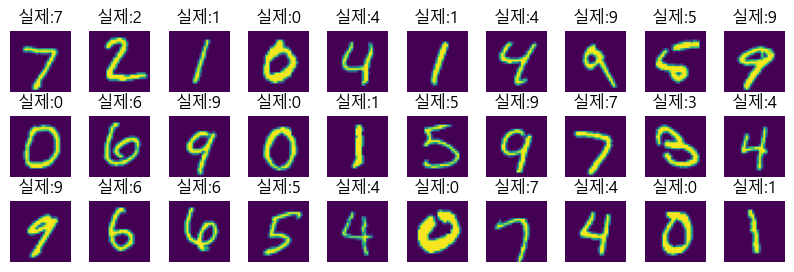

In [17]:
plt_row = 3
plt_col = 10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
# axes[0, 0].imshow(X_test[0].reshape(width, height))
# axes[0, 0].axis('off')
# title = "실제:{}".format(y_test[0])
# axes[0, 0].set_title(title)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
for i in range(plt_row*plt_col):
    subax = axes[i//plt_col, i%plt_col] # /// : 몫 연산자, % : 나머지 연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "실제:{}".format(y_test[i])
    subax.set_title(title)

# 1.DNN

In [38]:
%%time
# 1. 데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 (28,28) => 784 1차원 -> 실수형변환 -> 스케일조정
X_train = X_train.reshape(-1, width*height).astype('float32')/255.0
X_val = X_val.reshape(-1, width*height).astype('float32')/255.0
X_test = X_test.reshape(-1, width*height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델 구성
model = Sequential([
    Input(shape=(width*height,)),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
# model.summary()
# 3. 학습설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습
model.fit(X_train, Y_train,
         epochs=50, 
         validation_data=(X_val, Y_val),
         verbose=1)

Epoch 1/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.2677 - accuracy: 0.9182 - val_loss: 0.1195 - val_accuracy: 0.9642
Epoch 2/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.1407 - accuracy: 0.9588 - val_loss: 0.0977 - val_accuracy: 0.9716
Epoch 3/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1107 - accuracy: 0.9675 - val_loss: 0.0976 - val_accuracy: 0.9709
Epoch 4/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0961 - accuracy: 0.9712 - val_loss: 0.0966 - val_accuracy: 0.9720
Epoch 5/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0826 - accuracy: 0.9751 - val_loss: 0.0803 - val_accuracy: 0.9778
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.0746 - accuracy: 0.9775 - val_loss: 0.0863 - val_accuracy: 0.9754
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.0698 - accuracy: 0.9808 - val_loss: 0.1096 -

In [39]:
model.save('mnist_dnn.h5')

In [43]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1577 - accuracy: 0.9841


[0.1577337235212326, 0.9840999841690063]

In [59]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
print('실제값 :', y_test)
print('실제값 :', np.argmax(Y_test, axis=1))
yhat = model.predict(X_test).argmax(axis=1)
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

실제값 : [7 2 1 ... 4 5 6]
실제값 : [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 4ms/step


array([[ 972,    2,    1,    1,    0,    0,    2,    1,    1,    0],
       [   0, 1132,    1,    0,    0,    0,    0,    0,    2,    0],
       [   0,    2, 1019,    2,    1,    0,    0,    5,    3,    0],
       [   0,    0,    4,  993,    0,    4,    0,    2,    2,    5],
       [   0,    1,    6,    0,  963,    0,    3,    2,    1,    6],
       [   2,    0,    0,    4,    0,  878,    3,    1,    2,    2],
       [   2,    3,    0,    1,    1,    5,  944,    0,    2,    0],
       [   1,    1,   10,    1,    0,    1,    0, 1007,    1,    6],
       [   2,    1,    3,    4,    4,    2,    0,    4,  953,    1],
       [   1,    3,    0,    0,   13,    3,    0,    5,    4,  980]],
      dtype=int64)

In [60]:
# 실제값과 예측값이 다른 개수(방법1)
cnt = 0
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i!=j:
            cnt += data
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 159


In [61]:
# 실제값과 예측값이 다른 개수(방법2)
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
cnt

159

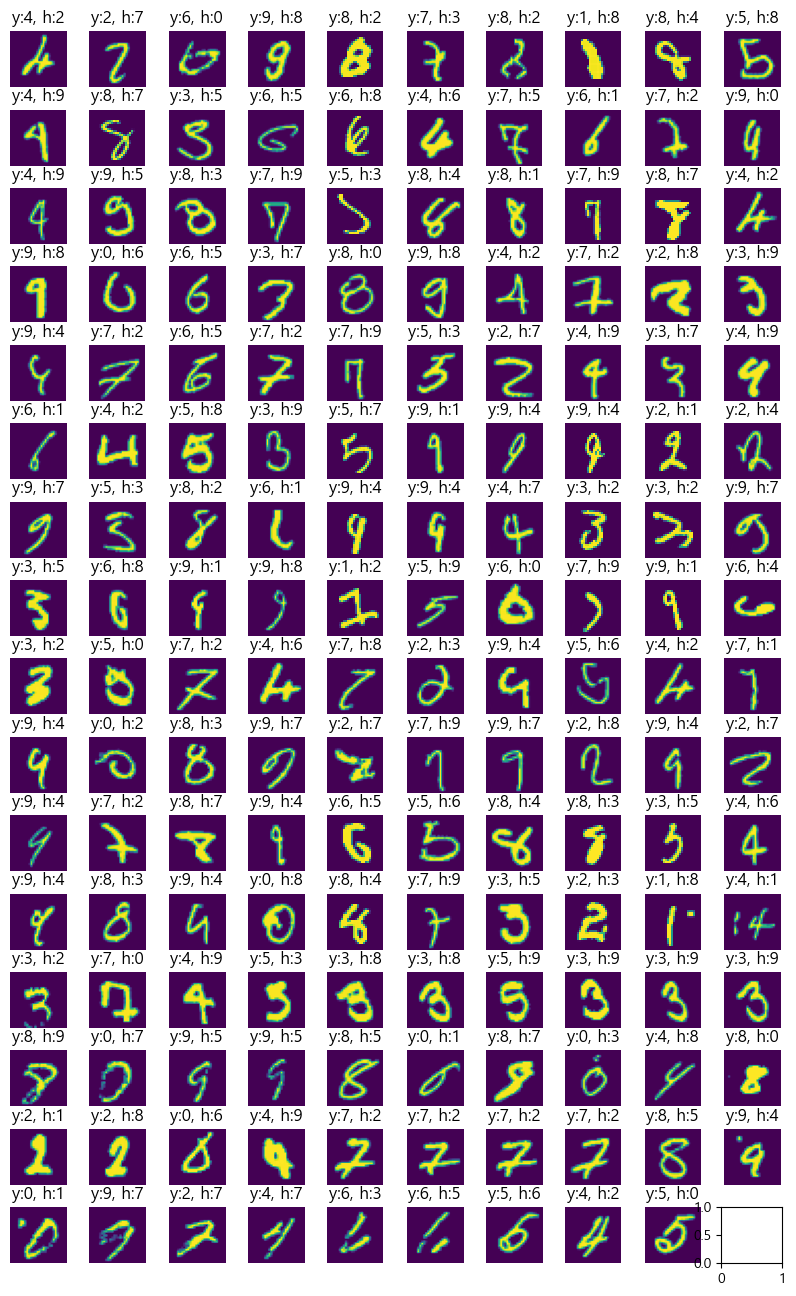

In [68]:
# CNN을 사용하여 예측이 틀린 데이터 출력(yhat 과 y_test가 다른 것들 159개)
plt_row = 16
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc("font", family="Malgun Gothic") # window에서 한글 시각화
# plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i=0 # yhat과 y_test의 index => yhat[i], y_test[i]를 비교
cnt = 0 # 이미지 출력횟수
while (i<len(y_test)) & (cnt < plt_row*plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue
    subax = axes[cnt//plt_col, cnt%plt_col] # /// : 몫 연산자, % : 나머지 연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y:{}, h:{}".format(y_test[i], yhat[i])
    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가

# CNN(컨볼루션 레이어 포함) - 교안 31page

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Input,Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
# 1. 데이터 생성 및 전처리
width=28; height=28
(X_train, y_train), (X_test, y_test)= mnist.load_data()
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 독립변수 (28,28) => 784 1차원 -> 실수형변환 -> 스케일조정
X_train = X_train.reshape(-1, width, height).astype('float32')/255.0
X_val = X_val.reshape(-1, width, height).astype('float32')/255.0
X_test = X_test.reshape(-1, width, height).astype('float32')/255.0
# 타겟변수 원핫인코딩
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((50000, 784),
 (50000, 10),
 (10000, 784),
 (10000, 10),
 (10000, 784),
 (10000, 10))

In [3]:
# 2. 모델생성
model = Sequential()
model.add(Conv2D(filters=32, # 필터 갯수
                kernel_size=3, # 필터 사이즈 3*3
                padding='same', # zero-padding을 하면 출력사이즈도 동일
                input_shape=(width, height, 1), # 입력채널 1개, 필터 32개 => 28*28*32 채널 출력
                activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2))) # => 14*14*32
model.add(Dropout(0.1))
model.add(Conv2D(64, (3,3), activation='relu')) # => ((14-3+1)*(14-3+1)*32) * 64
model.add(MaxPool2D(pool_size=(2,2))) # => 6*6
model.add(Dropout(0.25))
model.add(Flatten()) # 입력을 1차원으로
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()
# 320 => (3x3 필터가 weight 9 +1(bias))*32개 필터
# 18,496 (3*3필터가 weight 3*3*32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [ ]:
%%time
# 3. 학습설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습
earlyStopping = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train,
         epochs=50, batch_size=32,
         validation_data=(X_val, Y_val),
         callbacks=[earlyStopping])

NameError: name 'hist' is not defined

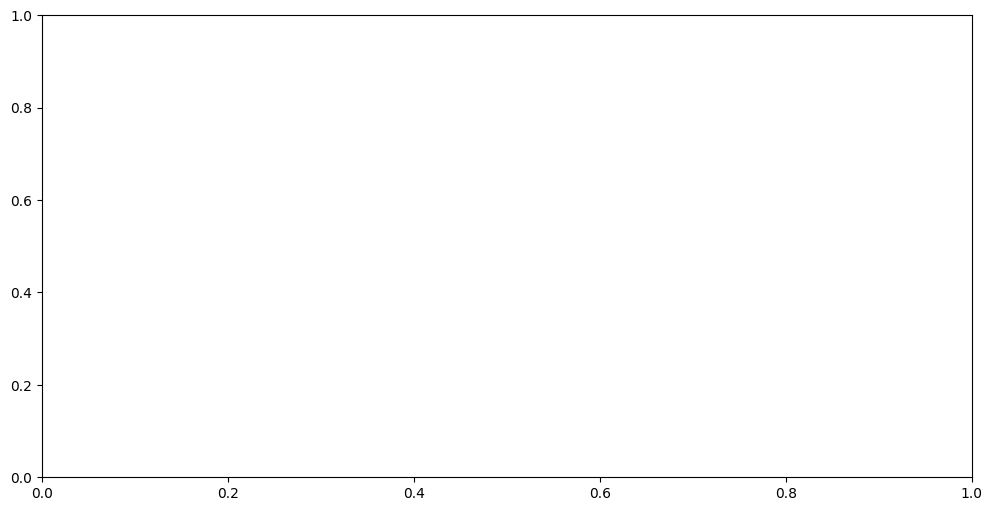

In [4]:
# 5. 모델 학습과정 시각화
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [5]:
model.evaluate(X_test,Y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
print('실제값 :', y_test)
print('실제값 :', Y_test.argmax(axis=1))
yhat = model.predict(X_test).argmax(axis=1)
print('예측값 :', yhat)

In [ ]:
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

In [ ]:
# 실제값과 예측값이 다른 갯수
cnt = 0
for y, h in zip(y_test, yhat) :
  if y!=h :
    cnt+=1
print('예측이 틀린 갯수 :', cnt)

In [ ]:
# CNN을 사용하여 예측이 틀린 데이터 출력(yhat 과 y_test가 다른 것들 75개)
plt_row = 7
plt_col = 10
plt.rcParams['figure.figsize'] = [plt_col, plt_row]
plt.rc("font", family="NanumBarunGothic") # 코랩에서 한글 시각화
fig, axes = plt.subplots(plt_row, plt_col)
plt.subplots_adjust(hspace=0.4, wspace=0.3)

i=0 # yhat과 y_test의 index => yhat[i], y_test[i]를 비교
cnt = 0 # 이미지 출력횟수
while (i<len(y_test)) & (cnt < plt_row*plt_col):
    if yhat[i] == y_test[i]:
        i += 1
        continue
    subax = axes[cnt//plt_col, cnt%plt_col] # /// : 몫 연산자, % : 나머지 연산자
    subax.imshow(X_test[i].reshape(width, height))
    subax.axis('off')
    title = "y:{}, h:{}".format(y_test[i], yhat[i])
    subax.set_title(title)
    cnt += 1 # 이미지 출력 번호 증가
    i += 1 # index 증가